# Text2emotion by subject

This notebook compare the sentiments of all the quotes from Foxnews and the Ny times with the text2emotion library. Then a graphic is added to reoresent some of the results. Some of the notable discorevies on this notebook are:
    - The emotion surprise wich seems to be the best to differenciate the two journals
    - The subject immigration, racism and terrorism wich seem to be the bests to differenciate the two journals
    - The impact of the subject on the values of the emotions

# Table of contents
1. [Text2emotion by subject](#t)
    * 1.1 [Immigration](#imt)
    * 1.2 [Terrorism](#tet)
    * 1.3 [Climate Change](#cct)
    * 1.4 [Abortion](#abt)
    * 1.5 [Religion](#ret)
    * 1.6 [Racism](#rat)
    
    
    
2. [Graphic](#g)

In [1]:
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import bz2
import json
from urllib.parse import urlparse
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import os
import glob
import pickle

In [2]:
from scipy import stats

In [3]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
PATH = 'data/'
df_fox = pd.DataFrame(columns=['quotation'])
df_ny = pd.DataFrame(columns=['quotation'])

for y in years:
    df_yfox = pd.read_pickle(PATH+str(y)+'_'+'Fox_quotations.pkl')
    df_yfox = df_yfox.to_frame()
    df_fox = df_fox.append(df_yfox)
    df_yNy = pd.read_pickle(PATH+str(y)+'_'+'NY_quotations.pkl')
    df_yNy = df_yNy.to_frame()
    df_ny = df_ny.append(df_yNy)

In [4]:
#The chosen key words are selected here
words_immigration = 'immigration|mexic|migrant|border|refugees'
words_terrorism = 'shoot|gun|kill|attack|massacre|victim|terroris|arm|violen|death'
words_ClimateChange = 'flood|greenhouse effect|CO2|global warming|pollution|glacier|ice pake melting|high temperatures|heat'
words_abortion = 'abort|fetus'
words_religion = 'God|Christian|Christianism|Belief|faith|prayer|commitment|islam|buddhism|hinduism|baptism|church|vatican|reincarnation|jesus'
words_racism = 'White|Black|Black lives matter|All lives matter|discrimination|Segregation|George Floyd|Slaver|White supremacy|Klu Klux Klan|KKK|Gunshot|Trials|Police|Death sentence'

## Text2emotion by subject<a name="t"></a>

In [5]:
from collections import namedtuple
import text2emotion as te

[nltk_data] Downloading package stopwords to C:\Users\François
[nltk_data]     CHARROIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\François
[nltk_data]     CHARROIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\François
[nltk_data]     CHARROIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Immigration<a name="imt"></a>

In [6]:
#Creating the dataframe with all the sentiment values from the text2emotion analysis
df_immi_t = pd.DataFrame(columns=['emotion','value','journal'])

lista = [words_immigration]
lista2 = ['immigration']


df_fox_word = df_fox[df_fox['quotation'].str.contains([l for l in lista][0])]
count_fox = len(df_fox_word)
n = len(df_fox)

for quotation in df_fox_word['quotation']:
    
    di = te.get_emotion(quotation)
    fear = di.get('Fear')
    happy = di.get('Happy')
    angry = di.get('Angry')
    surprise = di.get('Surprise')
    sad = di.get('Sad')
    
    newr = pd.Series(data = {'emotion': "fear", 'value': fear, 'journal': "foxnews"}, name = 'x')
    df_immi_t = df_immi_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "happy", 'value': happy, 'journal': "foxnews"}, name = 'x')
    df_immi_t = df_immi_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "angry", 'value': angry, 'journal': "foxnews"}, name = 'x')
    df_immi_t = df_immi_t.append(newr, ignore_index=True)
    

    newr = pd.Series(data = {'emotion': "surprise", 'value': surprise, 'journal': "foxnews"}, name = 'x')
    df_immi_t = df_immi_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "sad", 'value': sad, 'journal': "foxnews"}, name = 'x')
    df_immi_t = df_immi_t.append(newr, ignore_index=True)
    

df_ny_word = df_ny[df_ny['quotation'].str.contains([l for l in lista][0])]
count_ny = len(df_ny_word)
m = len(df_ny)


for quotation in df_ny_word['quotation']:
    
    di = te.get_emotion(quotation)
    fear = di.get('Fear')
    happy = di.get('Happy')
    angry = di.get('Angry')
    surprise = di.get('Surprise')
    sad = di.get('Sad')
    
    newr = pd.Series(data = {'emotion': "fear", 'value': fear, 'journal': "nytimes"}, name = 'x')
    df_immi_t = df_immi_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "happy", 'value': happy, 'journal': "nytimes"}, name = 'x')
    df_immi_t = df_immi_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "angry", 'value': angry, 'journal': "nytimes"}, name = 'x')
    df_immi_t = df_immi_t.append(newr, ignore_index=True)
    

    newr = pd.Series(data = {'emotion': "surprise", 'value': surprise, 'journal': "nytimes"}, name = 'x')
    df_immi_t = df_immi_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "sad", 'value': sad, 'journal': "nytimes"}, name = 'x')
    df_immi_t = df_immi_t.append(newr, ignore_index=True)

In [7]:
#Doing T-tests to see if there statiscaly significant difference for the distribution of the five emotions between NYt and Foxn

#First T-test is for fear
res = stats.ttest_ind(df_immi_t[df_immi_t['journal'] == "foxnews"][df_immi_t['emotion'] == "fear"]['value'],
                      df_immi_t[df_immi_t['journal'] == "nytimes"][df_immi_t['emotion'] == "fear"]['value'],
                      equal_var=True)

#T-test for happiness
res2 = stats.ttest_ind(df_immi_t[df_immi_t['journal'] == "foxnews"][df_immi_t['emotion'] == "happy"]['value'],
                       df_immi_t[df_immi_t['journal'] == "nytimes"][df_immi_t['emotion'] == "happy"]['value'],
                       equal_var=True) 

#T-test for angriness
res3 = stats.ttest_ind(df_immi_t[df_immi_t['journal'] == "foxnews"][df_immi_t['emotion'] == "angry"]['value'],
                       df_immi_t[df_immi_t['journal'] == "nytimes"][df_immi_t['emotion'] == "angry"]['value'],
                       equal_var=True) 

#T-test for surprise
res4 = stats.ttest_ind(df_immi_t[df_immi_t['journal'] == "foxnews"][df_immi_t['emotion'] == "surprise"]['value'],
                       df_immi_t[df_immi_t['journal'] == "nytimes"][df_immi_t['emotion'] == "surprise"]['value'],
                       equal_var=True) 

#T-test for sadness
res5 = stats.ttest_ind(df_immi_t[df_immi_t['journal'] == "foxnews"][df_immi_t['emotion'] == "sad"]['value'],
                       df_immi_t[df_immi_t['journal'] == "nytimes"][df_immi_t['emotion'] == "sad"]['value'],
                       equal_var=True) 

print(res)
print(res2)
print(res3)
print(res4)
print(res5)

Ttest_indResult(statistic=3.0411147616623926, pvalue=0.002361571122516187)
Ttest_indResult(statistic=-0.11994150518408088, pvalue=0.9045312744465707)
Ttest_indResult(statistic=-3.208466763423614, pvalue=0.001337570930271073)
Ttest_indResult(statistic=4.321322939465131, pvalue=1.5620891043857228e-05)
Ttest_indResult(statistic=0.36455783623529836, pvalue=0.7154472171716295)


C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\François CHARROIN\Anaconda3\li

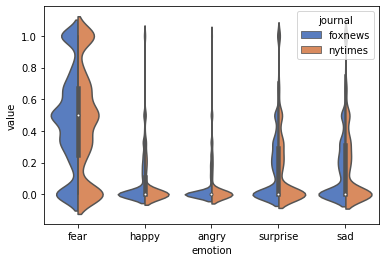

In [8]:
sns.violinplot(x = 'emotion', y = "value", hue = "journal",
                    data = df_immi_t, palette = "muted", split = True)

In [9]:
#fox means
a = df_immi_t[df_immi_t['journal'] == "foxnews"][df_immi_t['emotion'] == "fear"]['value'].mean()
b = df_immi_t[df_immi_t['journal'] == "foxnews"][df_immi_t['emotion'] == "happy"]['value'].mean()
c = df_immi_t[df_immi_t['journal'] == "foxnews"][df_immi_t['emotion'] == "angry"]['value'].mean()
d = df_immi_t[df_immi_t['journal'] == "foxnews"][df_immi_t['emotion'] == "surprise"]['value'].mean()
e = df_immi_t[df_immi_t['journal'] == "foxnews"][df_immi_t['emotion'] == "sad"]['value'].mean()


#ny means
g = df_immi_t[df_immi_t['journal'] == "nytimes"][df_immi_t['emotion'] == "fear"]['value'].mean()
h = df_immi_t[df_immi_t['journal'] == "nytimes"][df_immi_t['emotion'] == "happy"]['value'].mean()
i = df_immi_t[df_immi_t['journal'] == "nytimes"][df_immi_t['emotion'] == "angry"]['value'].mean()
j = df_immi_t[df_immi_t['journal'] == "nytimes"][df_immi_t['emotion'] == "surprise"]['value'].mean()
k = df_immi_t[df_immi_t['journal'] == "nytimes"][df_immi_t['emotion'] == "sad"]['value'].mean()

print("fox fear {0}".format(a))
print("fox happy {0}".format(b))
print("fox angry {0}".format(c))
print("fox surprise {0}".format(d))
print("fox sad {0}".format(e))

print("ny fear {0}".format(g))
print("ny happy {0}".format(h))
print("ny angry {0}".format(i))
print("ny surprise {0}".format(j))
print("ny sad {0}".format(k))

fox fear 0.468956647747856
fox happy 0.08202391015577852
fox angry 0.05074387151310217
fox surprise 0.17517087308296242
fox sad 0.17610916555971542
ny fear 0.45160917325110733
ny happy 0.08239159761032931
ny angry 0.05885141645789155
ny surprise 0.15778762767392618
ny sad 0.1745808440932748


C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserW

In [10]:
lst = [df_immi_t]
del lst     

## Terrorism<a name="tet"></a>

In [11]:
#Creating the dataframe with all the sentiment values from the text2emotion analysis
df_te_t = pd.DataFrame(columns = ['emotion','value','journal'])

lista = [words_terrorism]
lista2 = ['terrorism']


df_fox_word = df_fox[df_fox['quotation'].str.contains([l for l in lista][0])]
count_fox = len(df_fox_word)
n = len(df_fox)

for quotation in df_fox_word['quotation']:
    
    di = te.get_emotion(quotation)
    fear = di.get('Fear')
    happy = di.get('Happy')
    angry = di.get('Angry')
    surprise = di.get('Surprise')
    sad = di.get('Sad')
    
    newr = pd.Series(data = {'emotion': "fear", 'value': fear, 'journal': "foxnews"}, name = 'x')
    df_te_t = df_te_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "happy", 'value': happy, 'journal': "foxnews"}, name = 'x')
    df_te_t = df_te_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "angry", 'value': angry, 'journal': "foxnews"}, name = 'x')
    df_te_t = df_te_t.append(newr, ignore_index=True)
    

    newr = pd.Series(data = {'emotion': "surprise", 'value': surprise, 'journal': "foxnews"}, name = 'x')
    df_te_t = df_te_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "sad", 'value': sad, 'journal': "foxnews"}, name = 'x')
    df_te_t = df_te_t.append(newr, ignore_index=True)
    

df_ny_word = df_ny[df_ny['quotation'].str.contains([l for l in lista][0])]
count_ny = len(df_ny_word)
m = len(df_ny)


for quotation in df_ny_word['quotation']:
    
    di = te.get_emotion(quotation)
    fear = di.get('Fear')
    happy = di.get('Happy')
    angry = di.get('Angry')
    surprise = di.get('Surprise')
    sad = di.get('Sad')
    
    newr = pd.Series(data = {'emotion': "fear", 'value': fear, 'journal': "nytimes"}, name = 'x')
    df_te_t = df_te_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "happy", 'value': happy, 'journal': "nytimes"}, name = 'x')
    df_te_t = df_te_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "angry", 'value': angry, 'journal': "nytimes"}, name = 'x')
    df_te_t = df_te_t.append(newr, ignore_index=True)
    

    newr = pd.Series(data = {'emotion': "surprise", 'value': surprise, 'journal': "nytimes"}, name = 'x')
    df_te_t = df_te_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "sad", 'value': sad, 'journal': "nytimes"}, name = 'x')
    df_te_t = df_te_t.append(newr, ignore_index=True)

In [12]:
#Doing T-tests to see if there statiscaly significant difference for the distribution of the five emotions between NYt and Foxn

#First T-test is for fear
res = stats.ttest_ind(df_te_t[df_te_t['journal'] == "foxnews"][df_te_t['emotion'] == "fear"]['value'],
                      df_te_t[df_te_t['journal'] == "nytimes"][df_te_t['emotion'] == "fear"]['value'],
                      equal_var = True)

#T-test for happiness
res2 = stats.ttest_ind(df_te_t[df_te_t['journal'] == "foxnews"][df_te_t['emotion'] == "happy"]['value'],
                       df_te_t[df_te_t['journal'] == "nytimes"][df_te_t['emotion'] == "happy"]['value'],
                       equal_var = True) 

#T-test for angriness
res3 = stats.ttest_ind(df_te_t[df_te_t['journal'] == "foxnews"][df_te_t['emotion'] == "angry"]['value'],
                       df_te_t[df_te_t['journal'] == "nytimes"][df_te_t['emotion'] == "angry"]['value'],
                       equal_var = True) 

#T-test for surprise
res4 = stats.ttest_ind(df_te_t[df_te_t['journal'] == "foxnews"][df_te_t['emotion'] == "surprise"]['value'],
                       df_te_t[df_te_t['journal'] == "nytimes"][df_te_t['emotion'] == "surprise"]['value'],
                       equal_var = True) 

#T-test for sadness
res5 = stats.ttest_ind(df_te_t[df_te_t['journal'] == "foxnews"][df_te_t['emotion'] == "sad"]['value'],
                       df_te_t[df_te_t['journal'] == "nytimes"][df_te_t['emotion'] == "sad"]['value'],
                       equal_var = True) 

print(res)
print(res2)
print(res3)
print(res4)
print(res5)

C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\François CHARROIN\Anaconda3\li

Ttest_indResult(statistic=1.8361044575972378, pvalue=0.06634631097017142)
Ttest_indResult(statistic=-2.291489925787538, pvalue=0.021937953951475856)
Ttest_indResult(statistic=-2.1503084459813726, pvalue=0.03153412860387407)
Ttest_indResult(statistic=5.021651254022099, pvalue=5.135063859089865e-07)
Ttest_indResult(statistic=4.766880890176559, pvalue=1.8746292159299386e-06)


C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


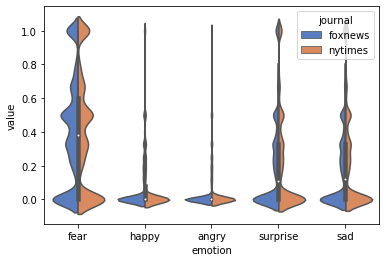

In [13]:
sns.violinplot(x = 'emotion', y = "value", hue = "journal",
                    data = df_te_t, palette = "muted", split = True)

In [14]:
#fox means
a = df_te_t[df_te_t['journal'] == "foxnews"][df_te_t['emotion']=="fear"]['value'].mean()
b = df_te_t[df_te_t['journal'] == "foxnews"][df_te_t['emotion']=="happy"]['value'].mean()
c = df_te_t[df_te_t['journal'] == "foxnews"][df_te_t['emotion']=="angry"]['value'].mean()
d = df_te_t[df_te_t['journal'] == "foxnews"][df_te_t['emotion']=="surprise"]['value'].mean()
e = df_te_t[df_te_t['journal'] == "foxnews"][df_te_t['emotion']=="sad"]['value'].mean()


#ny means
g = df_te_t[df_te_t['journal'] == "nytimes"][df_te_t['emotion'] == "fear"]['value'].mean()
h = df_te_t[df_te_t['journal'] == "nytimes"][df_te_t['emotion'] == "happy"]['value'].mean()
i = df_te_t[df_te_t['journal'] == "nytimes"][df_te_t['emotion'] == "angry"]['value'].mean()
j = df_te_t[df_te_t['journal'] == "nytimes"][df_te_t['emotion'] == "surprise"]['value'].mean()
k = df_te_t[df_te_t['journal'] == "nytimes"][df_te_t['emotion'] == "sad"]['value'].mean()

print("fox fear {0}".format(a))
print("fox happy {0}".format(b))
print("fox angry {0}".format(c))
print("fox surprise {0}".format(d))
print("fox sad {0}".format(e))

print("ny fear {0}".format(g))
print("ny happy {0}".format(h))
print("ny angry {0}".format(i))
print("ny surprise {0}".format(j))
print("ny sad {0}".format(k))

C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserW

fox fear 0.3959787942300614
fox happy 0.07777980520280797
fox angry 0.04408802860313111
fox surprise 0.21587498458882556
fox sad 0.20927851066452394
ny fear 0.39146655339500364
ny happy 0.08074507582908452
ny angry 0.04625574224403765
ny surprise 0.20558429299602934
ny sad 0.1999603549178712


C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [15]:
lst = [df_te_t]
del lst     

## Climate change<a name="cct"></a>

In [16]:
#Creating the dataframe with all the sentiment values from the text2emotion analysis
df_cc_t = pd.DataFrame(columns = ['emotion','value','journal'])

lista = [words_ClimateChange]
lista2 = ['climate change']


df_fox_word = df_fox[df_fox['quotation'].str.contains([l for l in lista][0])]
count_fox = len(df_fox_word)
n = len(df_fox)

for quotation in df_fox_word['quotation']:
    
    di = te.get_emotion(quotation)
    fear = di.get('Fear')
    happy = di.get('Happy')
    angry = di.get('Angry')
    surprise = di.get('Surprise')
    sad = di.get('Sad')
    
    newr = pd.Series(data = {'emotion': "fear", 'value': fear, 'journal': "foxnews"}, name = 'x')
    df_cc_t = df_cc_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "happy", 'value': happy, 'journal': "foxnews"}, name = 'x')
    df_cc_t = df_cc_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "angry", 'value': angry, 'journal': "foxnews"}, name = 'x')
    df_cc_t = df_cc_t.append(newr, ignore_index=True)
    

    newr = pd.Series(data = {'emotion': "surprise", 'value': surprise, 'journal': "foxnews"}, name = 'x')
    df_cc_t = df_cc_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "sad", 'value': sad, 'journal': "foxnews"}, name = 'x')
    df_cc_t = df_cc_t.append(newr, ignore_index=True)
    

df_ny_word = df_ny[df_ny['quotation'].str.contains([l for l in lista][0])]
count_ny = len(df_ny_word)
m = len(df_ny)


for quotation in df_ny_word['quotation']:
    
    di = te.get_emotion(quotation)
    fear = di.get('Fear')
    happy = di.get('Happy')
    angry = di.get('Angry')
    surprise = di.get('Surprise')
    sad = di.get('Sad')
    
    newr = pd.Series(data = {'emotion': "fear", 'value': fear, 'journal': "nytimes"}, name = 'x')
    df_cc_t = df_cc_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "happy", 'value': happy, 'journal': "nytimes"}, name = 'x')
    df_cc_t = df_cc_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "angry", 'value': angry, 'journal': "nytimes"}, name = 'x')
    df_cc_t = df_cc_t.append(newr, ignore_index=True)
    

    newr = pd.Series(data = {'emotion': "surprise", 'value': surprise, 'journal': "nytimes"}, name = 'x')
    df_cc_t = df_cc_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "sad", 'value': sad, 'journal': "nytimes"}, name = 'x')
    df_cc_t = df_cc_t.append(newr, ignore_index=True)

In [17]:
#Doing T-tests to see if there statiscaly significant difference for the distribution of the five emotions between NYt and Foxn

#First T-test is for fear
res = stats.ttest_ind(df_cc_t[df_cc_t['journal'] == "foxnews"][df_cc_t['emotion'] == "fear"]['value'],
                      df_cc_t[df_cc_t['journal'] == "nytimes"][df_cc_t['emotion'] == "fear"]['value'], 
                      equal_var = True)

#T-test for happiness
res2 = stats.ttest_ind(df_cc_t[df_cc_t['journal'] == "foxnews"][df_cc_t['emotion'] == "happy"]['value'],
                       df_cc_t[df_cc_t['journal'] == "nytimes"][df_cc_t['emotion'] == "happy"]['value'],
                       equal_var = True) 

#T-test for angriness
res3 = stats.ttest_ind(df_cc_t[df_cc_t['journal'] == "foxnews"][df_cc_t['emotion'] == "angry"]['value'],
                       df_cc_t[df_cc_t['journal'] == "nytimes"][df_cc_t['emotion'] == "angry"]['value'],
                       equal_var = True) 

#T-test for surprise
res4 = stats.ttest_ind(df_cc_t[df_cc_t['journal'] == "foxnews"][df_cc_t['emotion'] == "surprise"]['value'],
                       df_cc_t[df_cc_t['journal'] == "nytimes"][df_cc_t['emotion'] == "surprise"]['value'],
                       equal_var = True) 

#T-test for sadness
res5 = stats.ttest_ind(df_cc_t[df_cc_t['journal'] == "foxnews"][df_cc_t['emotion'] == "sad"]['value'],
                       df_cc_t[df_cc_t['journal'] == "nytimes"][df_cc_t['emotion'] == "sad"]['value'],
                       equal_var = True) 

print(res)
print(res2)
print(res3)
print(res4)
print(res5)

Ttest_indResult(statistic=0.9803629371555516, pvalue=0.3269453181328119)
Ttest_indResult(statistic=-0.9186141155819271, pvalue=0.3583332443961742)
Ttest_indResult(statistic=-0.07948524604717502, pvalue=0.9366492362378087)
Ttest_indResult(statistic=2.682966332458749, pvalue=0.0073166318353193325)
Ttest_indResult(statistic=1.9376572321692143, pvalue=0.052710489265420886)


C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\François CHARROIN\Anaconda3\li

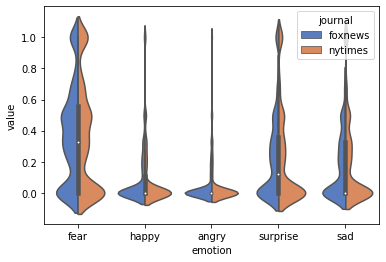

In [18]:
sns.violinplot(x = 'emotion', y = "value", hue = "journal",
                    data = df_cc_t, palette = "muted", split = True)

In [19]:
#fox means
a = df_cc_t[df_cc_t['journal'] == "foxnews"][df_cc_t['emotion'] == "fear"]['value'].mean()
b = df_cc_t[df_cc_t['journal'] == "foxnews"][df_cc_t['emotion'] == "happy"]['value'].mean()
c = df_cc_t[df_cc_t['journal'] == "foxnews"][df_cc_t['emotion'] == "angry"]['value'].mean()
d = df_cc_t[df_cc_t['journal'] == "foxnews"][df_cc_t['emotion'] == "surprise"]['value'].mean()
e = df_cc_t[df_cc_t['journal'] == "foxnews"][df_cc_t['emotion'] == "sad"]['value'].mean()


#ny means
g = df_cc_t[df_cc_t['journal'] == "nytimes"][df_cc_t['emotion'] == "fear"]['value'].mean()
h = df_cc_t[df_cc_t['journal'] == "nytimes"][df_cc_t['emotion'] == "happy"]['value'].mean()
i = df_cc_t[df_cc_t['journal'] == "nytimes"][df_cc_t['emotion'] == "angry"]['value'].mean()
j = df_cc_t[df_cc_t['journal'] == "nytimes"][df_cc_t['emotion'] == "surprise"]['value'].mean()
k = df_cc_t[df_cc_t['journal'] == "nytimes"][df_cc_t['emotion'] == "sad"]['value'].mean()

print("fox fear {0}".format(a))
print("fox happy {0}".format(b))
print("fox angry {0}".format(c))
print("fox surprise {0}".format(d))
print("fox sad {0}".format(e))

print("ny fear {0}".format(g))
print("ny happy {0}".format(h))
print("ny angry {0}".format(i))
print("ny surprise {0}".format(j))
print("ny sad {0}".format(k))

fox fear 0.3717319277108437
fox happy 0.085410391566265
fox angry 0.04771460843373498
fox surprise 0.23715737951807267
fox sad 0.19858057228915657
ny fear 0.36341442715700184
ny happy 0.08982743988684568
ny angry 0.04800282885431402
ny surprise 0.2173465346534656
ny sad 0.18577086280056607


C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserW

In [20]:
lst = [df_cc_t]
del lst     

## Abortion<a name="abt"></a>

In [21]:
#Creating the dataframe with all the sentiment values from the text2emotion analysis
df_ab_t = pd.DataFrame(columns = ['emotion','value','journal'])

lista = [words_abortion]
lista2 = ['abortion']


df_fox_word = df_fox[df_fox['quotation'].str.contains([l for l in lista][0])]
count_fox = len(df_fox_word)
n = len(df_fox)

for quotation in df_fox_word['quotation']:
    
    di = te.get_emotion(quotation)
    fear = di.get('Fear')
    happy = di.get('Happy')
    angry = di.get('Angry')
    surprise = di.get('Surprise')
    sad = di.get('Sad')
    
    newr = pd.Series(data = {'emotion': "fear", 'value': fear, 'journal': "foxnews"}, name = 'x')
    df_ab_t = df_ab_t.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "happy", 'value': happy, 'journal': "foxnews"}, name = 'x')
    df_ab_t = df_ab_t.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "angry", 'value': angry, 'journal': "foxnews"}, name = 'x')
    df_ab_t = df_ab_t.append(newr, ignore_index = True)
    

    newr = pd.Series(data = {'emotion': "surprise", 'value': surprise, 'journal': "foxnews"}, name = 'x')
    df_ab_t = df_ab_t.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "sad", 'value': sad, 'journal': "foxnews"}, name = 'x')
    df_ab_t = df_ab_t.append(newr, ignore_index = True)
    

df_ny_word = df_ny[df_ny['quotation'].str.contains([l for l in lista][0])]
count_ny = len(df_ny_word)
m = len(df_ny)


for quotation in df_ny_word['quotation']:
    
    di = te.get_emotion(quotation)
    fear = di.get('Fear')
    happy = di.get('Happy')
    angry = di.get('Angry')
    surprise = di.get('Surprise')
    sad = di.get('Sad')
    
    newr = pd.Series(data = {'emotion': "fear", 'value': fear, 'journal': "nytimes"}, name = 'x')
    df_ab_t = df_ab_t.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "happy", 'value': happy, 'journal': "nytimes"}, name = 'x')
    df_ab_t = df_ab_t.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "angry", 'value': angry, 'journal': "nytimes"}, name = 'x')
    df_ab_t = df_ab_t.append(newr, ignore_index = True)
    

    newr = pd.Series(data = {'emotion': "surprise", 'value': surprise, 'journal': "nytimes"}, name = 'x')
    df_ab_t = df_ab_t.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "sad", 'value': sad, 'journal': "nytimes"}, name = 'x')
    df_ab_t = df_ab_t.append(newr, ignore_index = True)

In [22]:
#Doing T-tests to see if there statiscaly significant difference for the distribution of the five emotions between NYt and Foxn

#T-test for fear
res = stats.ttest_ind(df_ab_t[df_ab_t['journal'] == "foxnews"][df_ab_t['emotion'] == "fear"]['value'],
                      df_ab_t[df_ab_t['journal'] == "nytimes"][df_ab_t['emotion'] == "fear"]['value'],
                      equal_var = True)

#T-test for happiness
res2 = stats.ttest_ind(df_ab_t[df_ab_t['journal'] == "foxnews"][df_ab_t['emotion'] == "happy"]['value'],
                       df_ab_t[df_ab_t['journal'] == "nytimes"][df_ab_t['emotion'] == "happy"]['value'],
                       equal_var = True) 

#T-test for angriness
res3 = stats.ttest_ind(df_ab_t[df_ab_t['journal'] == "foxnews"][df_ab_t['emotion'] == "angry"]['value'],
                       df_ab_t[df_ab_t['journal'] == "nytimes"][df_ab_t['emotion'] == "angry"]['value'],
                       equal_var = True)

#T-test for surprise
res4 = stats.ttest_ind(df_ab_t[df_ab_t['journal'] == "foxnews"][df_ab_t['emotion'] == "surprise"]['value'],
                       df_ab_t[df_ab_t['journal'] == "nytimes"][df_ab_t['emotion'] == "surprise"]['value'],
                       equal_var = True) 

#T-test for sadness
res5 = stats.ttest_ind(df_ab_t[df_ab_t['journal'] == "foxnews"][df_ab_t['emotion'] == "sad"]['value'],
                       df_ab_t[df_ab_t['journal'] == "nytimes"][df_ab_t['emotion'] == "sad"]['value'],
                       equal_var = True) 

print(res)
print(res2)
print(res3)
print(res4)
print(res5)

Ttest_indResult(statistic=0.16640859063054592, pvalue=0.8678533847784137)
Ttest_indResult(statistic=-0.7091606869544608, pvalue=0.47831307487594477)
Ttest_indResult(statistic=1.3315942814163593, pvalue=0.18315566095472416)
Ttest_indResult(statistic=0.14043778268819476, pvalue=0.8883292161090531)
Ttest_indResult(statistic=0.6464386749507396, pvalue=0.5180745429970222)


C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\François CHARROIN\Anaconda3\li

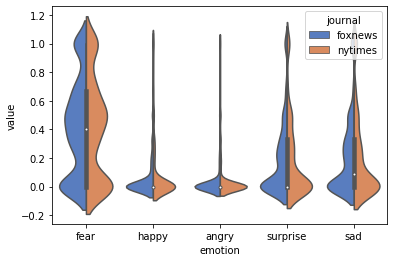

In [23]:
sns.violinplot(x = 'emotion', y = "value", hue = "journal",
                    data = df_ab_t, palette = "muted", split = True)

In [24]:
#fox means
a = df_ab_t[df_ab_t['journal'] == "foxnews"][df_ab_t['emotion'] == "fear"]['value'].mean()
b = df_ab_t[df_ab_t['journal'] == "foxnews"][df_ab_t['emotion'] == "happy"]['value'].mean()
c = df_ab_t[df_ab_t['journal'] == "foxnews"][df_ab_t['emotion'] == "angry"]['value'].mean()
d = df_ab_t[df_ab_t['journal'] == "foxnews"][df_ab_t['emotion'] == "surprise"]['value'].mean()
e = df_ab_t[df_ab_t['journal'] == "foxnews"][df_ab_t['emotion'] == "sad"]['value'].mean()


#ny means
g = df_ab_t[df_ab_t['journal'] == "nytimes"][df_ab_t['emotion'] == "fear"]['value'].mean()
h = df_ab_t[df_ab_t['journal'] == "nytimes"][df_ab_t['emotion'] == "happy"]['value'].mean()
i = df_ab_t[df_ab_t['journal'] == "nytimes"][df_ab_t['emotion'] == "angry"]['value'].mean()
j = df_ab_t[df_ab_t['journal'] == "nytimes"][df_ab_t['emotion'] == "surprise"]['value'].mean()
k = df_ab_t[df_ab_t['journal'] == "nytimes"][df_ab_t['emotion'] == "sad"]['value'].mean()

print("fox fear {0}".format(a))
print("fox happy {0}".format(b))
print("fox angry {0}".format(c))
print("fox surprise {0}".format(d))
print("fox sad {0}".format(e))

print("ny fear {0}".format(g))
print("ny happy {0}".format(h))
print("ny angry {0}".format(i))
print("ny surprise {0}".format(j))
print("ny sad {0}".format(k))

fox fear 0.40668049792531136
fox happy 0.06648962655601669
fox angry 0.04234024896265562
fox surprise 0.19239004149377587
fox sad 0.20857261410788416
ny fear 0.4039461883408074
ny happy 0.07206278026905828
ny angry 0.03402092675635275
ny surprise 0.1906128550074739
ny sad 0.20005979073243657


C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserW

In [25]:
lst = [df_ab_t]
del lst  

## Religion<a name="ret"></a>

In [26]:
#Creating the dataframe with all the sentiment values from the text2emotion analysis
df_re_t = pd.DataFrame(columns = ['emotion','value','journal'])

lista = [words_religion]
lista2 = ['religion']


df_fox_word = df_fox[df_fox['quotation'].str.contains([l for l in lista][0])]
count_fox = len(df_fox_word)
n = len(df_fox)

for quotation in df_fox_word['quotation']:
    
    di = te.get_emotion(quotation)
    fear = di.get('Fear')
    happy = di.get('Happy')
    angry = di.get('Angry')
    surprise = di.get('Surprise')
    sad = di.get('Sad')
    
    newr = pd.Series(data = {'emotion': "fear", 'value': fear, 'journal': "foxnews"}, name = 'x')
    df_re_t = df_re_t.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "happy", 'value': happy, 'journal': "foxnews"}, name = 'x')
    df_re_t = df_re_t.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "angry", 'value': angry, 'journal': "foxnews"}, name = 'x')
    df_re_t = df_re_t.append(newr, ignore_index = True)


    newr = pd.Series(data = {'emotion': "surprise", 'value': surprise, 'journal': "foxnews"}, name = 'x')
    df_re_t = df_re_t.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "sad", 'value': sad, 'journal': "foxnews"}, name = 'x')
    df_re_t = df_re_t.append(newr, ignore_index = True)
    

df_ny_word = df_ny[df_ny['quotation'].str.contains([l for l in lista][0])]
count_ny = len(df_ny_word)
m = len(df_ny)


for quotation in df_ny_word['quotation']:
    
    di = te.get_emotion(quotation)
    fear = di.get('Fear')
    happy = di.get('Happy')
    angry = di.get('Angry')
    surprise = di.get('Surprise')
    sad = di.get('Sad')
    
    newr = pd.Series(data = {'emotion': "fear", 'value': fear, 'journal': "nytimes"}, name = 'x')
    df_re_t = df_re_t.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "happy", 'value': happy, 'journal': "nytimes"}, name = 'x')
    df_re_t = df_re_t.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "angry", 'value': angry, 'journal': "nytimes"}, name = 'x')
    df_re_t = df_re_t.append(newr, ignore_index = True)
    

    newr = pd.Series(data = {'emotion': "surprise", 'value': surprise, 'journal': "nytimes"}, name = 'x')
    df_re_t = df_re_t.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "sad", 'value': sad, 'journal': "nytimes"}, name = 'x')
    df_re_t = df_re_t.append(newr, ignore_index = True)

In [27]:
#Doing T-tests to see if there statiscaly significant difference for the distribution of the five emotions between NYt and Foxn

#T-test for fear
res = stats.ttest_ind(df_re_t[df_re_t['journal'] == "foxnews"][df_re_t['emotion'] == "fear"]['value'],
                      df_re_t[df_re_t['journal'] == "nytimes"][df_re_t['emotion'] == "fear"]['value'],
                      equal_var = True)

#T-test for happiness
res2 = stats.ttest_ind(df_re_t[df_re_t['journal'] == "foxnews"][df_re_t['emotion'] == "happy"]['value'],
                       df_re_t[df_re_t['journal'] == "nytimes"][df_re_t['emotion'] == "happy"]['value'],
                       equal_var = True) 

#T-test for angriness
res3 = stats.ttest_ind(df_re_t[df_re_t['journal'] == "foxnews"][df_re_t['emotion'] == "angry"]['value'],
                       df_re_t[df_re_t['journal'] == "nytimes"][df_re_t['emotion'] == "angry"]['value'],
                       equal_var = True) 

#T-test for surprise
res4 = stats.ttest_ind(df_re_t[df_re_t['journal'] == "foxnews"][df_re_t['emotion'] == "surprise"]['value'],
                       df_re_t[df_re_t['journal'] == "nytimes"][df_re_t['emotion'] == "surprise"]['value'],
                       equal_var = True) 

#T-test for sadness
res5 = stats.ttest_ind(df_re_t[df_re_t['journal'] == "foxnews"][df_re_t['emotion'] == "sad"]['value'],
                       df_re_t[df_re_t['journal'] == "nytimes"][df_re_t['emotion'] == "sad"]['value'],
                       equal_var = True) 

print(res)
print(res2)
print(res3)
print(res4)
print(res5)

C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\François CHARROIN\Anaconda3\li

Ttest_indResult(statistic=1.9980719682395505, pvalue=0.04572155315536299)
Ttest_indResult(statistic=7.2218792830105265, pvalue=5.299939996069938e-13)
Ttest_indResult(statistic=1.6072834688582578, pvalue=0.10800702530263884)
Ttest_indResult(statistic=-5.88709607089693, pvalue=3.989366394038828e-09)
Ttest_indResult(statistic=4.280705658267136, pvalue=1.8711604901913784e-05)


C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


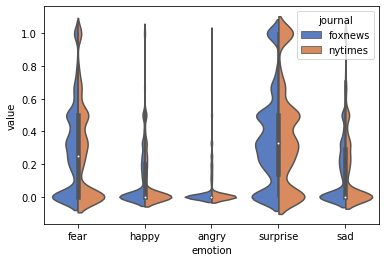

In [28]:
sns.violinplot(x = 'emotion', y = "value", hue = "journal",
                    data = df_re_t, palette = "muted", split = True)

In [29]:
#fox means
a = df_re_t[df_re_t['journal'] == "foxnews"][df_re_t['emotion'] == "fear"]['value'].mean()
b = df_re_t[df_re_t['journal'] == "foxnews"][df_re_t['emotion'] == "happy"]['value'].mean()
c = df_re_t[df_re_t['journal'] == "foxnews"][df_re_t['emotion'] == "angry"]['value'].mean()
d = df_re_t[df_re_t['journal'] == "foxnews"][df_re_t['emotion'] == "surprise"]['value'].mean()
e = df_re_t[df_re_t['journal'] == "foxnews"][df_re_t['emotion'] == "sad"]['value'].mean()


#ny means
g = df_re_t[df_re_t['journal'] == "nytimes"][df_re_t['emotion'] == "fear"]['value'].mean()
h = df_re_t[df_re_t['journal'] == "nytimes"][df_re_t['emotion'] == "happy"]['value'].mean()
i = df_re_t[df_re_t['journal'] == "nytimes"][df_re_t['emotion'] == "angry"]['value'].mean()
j = df_re_t[df_re_t['journal'] == "nytimes"][df_re_t['emotion'] == "surprise"]['value'].mean()
k = df_re_t[df_re_t['journal'] == "nytimes"][df_re_t['emotion'] == "sad"]['value'].mean()

print("fox fear {0}".format(a))
print("fox happy {0}".format(b))
print("fox angry {0}".format(c))
print("fox surprise {0}".format(d))
print("fox sad {0}".format(e))

print("ny fear {0}".format(g))
print("ny happy {0}".format(h))
print("ny angry {0}".format(i))
print("ny surprise {0}".format(j))
print("ny sad {0}".format(k))

C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserW

fox fear 0.2911677183142423
fox happy 0.11466074628028376
fox angry 0.03748383578717756
fox surprise 0.3598325153852094
fox sad 0.1676482044091304
ny fear 0.2833715569216213
ny happy 0.09597115498285894
ny angry 0.03503487409859311
ny surprise 0.38464121054497746
ny sad 0.15464593923631703


C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [30]:
lst = [df_re_t]
del lst  

## Racism<a name="rat"></a>

In [32]:
#Creating the dataframe with all the sentiment values from the text2emotion analysis
df_ra_t = pd.DataFrame(columns = ['emotion','value','journal'])

lista = [words_racism]
lista2 = ['racism']


df_fox_word = df_fox[df_fox['quotation'].str.contains([l for l in lista][0])]
count_fox = len(df_fox_word)
n = len(df_fox)

for quotation in df_fox_word['quotation']:
    
    di = te.get_emotion(quotation)
    fear = di.get('Fear')
    happy = di.get('Happy')
    angry = di.get('Angry')
    surprise = di.get('Surprise')
    sad = di.get('Sad')
    
    newr = pd.Series(data = {'emotion': "fear", 'value': fear, 'journal': "foxnews"}, name = 'x')
    df_ra_t = df_ra_t.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "happy", 'value': happy, 'journal': "foxnews"}, name = 'x')
    df_ra_t = df_ra_t.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "angry", 'value': angry, 'journal': "foxnews"}, name = 'x')
    df_ra_t = df_ra_t.append(newr, ignore_index = True)


    newr = pd.Series(data = {'emotion': "surprise", 'value': surprise, 'journal': "foxnews"}, name = 'x')
    df_ra_t = df_ra_t.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "sad", 'value': sad, 'journal': "foxnews"}, name = 'x')
    df_ra_t = df_ra_t.append(newr, ignore_index = True)
    

df_ny_word = df_ny[df_ny['quotation'].str.contains([l for l in lista][0])]
count_ny = len(df_ny_word)
m = len(df_ny)


for quotation in df_ny_word['quotation']:
    
    di = te.get_emotion(quotation)
    fear = di.get('Fear')
    happy = di.get('Happy')
    angry = di.get('Angry')
    surprise = di.get('Surprise')
    sad = di.get('Sad')
    
    newr = pd.Series(data = {'emotion': "fear", 'value': fear, 'journal': "nytimes"}, name = 'x')
    df_ra_t = df_ra_t.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "happy", 'value': happy, 'journal': "nytimes"}, name = 'x')
    df_ra_t = df_ra_t.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "angry", 'value': angry, 'journal': "nytimes"}, name = 'x')
    df_ra_t = df_ra_t.append(newr, ignore_index = True)
    

    newr = pd.Series(data = {'emotion': "surprise", 'value': surprise, 'journal': "nytimes"}, name = 'x')
    df_ra_t = df_ra_t.append(newr, ignore_index = True)
    
    newr = pd.Series(data = {'emotion': "sad", 'value': sad, 'journal': "nytimes"}, name = 'x')
    df_ra_t = df_ra_t.append(newr, ignore_index = True)

In [33]:
#Doing T-tests to see if there statiscaly significant difference for the distribution of the five emotions between NYt and Foxn


#T-test for fear
res = stats.ttest_ind(df_ra_t[df_ra_t['journal'] == "foxnews"][df_ra_t['emotion'] == "fear"]['value'],
                      df_ra_t[df_ra_t['journal'] == "nytimes"][df_ra_t['emotion'] == "fear"]['value'],
                      equal_var = True)

#T-test for happiness
res2 = stats.ttest_ind(df_ra_t[df_ra_t['journal'] == "foxnews"][df_ra_t['emotion'] == "happy"]['value'],
                       df_ra_t[df_ra_t['journal'] == "nytimes"][df_ra_t['emotion'] == "happy"]['value'],
                       equal_var = True) 

#T-test for angriness
res3 = stats.ttest_ind(df_ra_t[df_ra_t['journal'] == "foxnews"][df_ra_t['emotion'] == "angry"]['value'],
                       df_ra_t[df_ra_t['journal'] == "nytimes"][df_ra_t['emotion'] == "angry"]['value'],
                       equal_var = True) 
#T-test for surprise
res4 = stats.ttest_ind(df_ra_t[df_ra_t['journal'] == "foxnews"][df_ra_t['emotion'] == "surprise"]['value'],
                       df_ra_t[df_ra_t['journal'] == "nytimes"][df_ra_t['emotion'] == "surprise"]['value'],
                       equal_var = True) 

#T-test for sadness
res5 = stats.ttest_ind(df_ra_t[df_ra_t['journal'] == "foxnews"][df_ra_t['emotion'] == "sad"]['value'],
                       df_ra_t[df_ra_t['journal'] == "nytimes"][df_ra_t['emotion'] == "sad"]['value'],
                       equal_var = True) 

print(res)
print(res2)
print(res3)
print(res4)
print(res5)

C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\François CHARROIN\Anaconda3\li

Ttest_indResult(statistic=0.45446894483384914, pvalue=0.6494996648200828)
Ttest_indResult(statistic=1.161389027408335, pvalue=0.2455071261657969)
Ttest_indResult(statistic=0.2763198608990519, pvalue=0.7823072224039005)
Ttest_indResult(statistic=7.6802927640146885, pvalue=1.7119721652701033e-14)
Ttest_indResult(statistic=2.668829576758542, pvalue=0.0076219746625431715)


C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


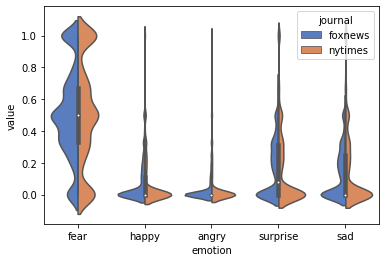

In [34]:
sns.violinplot(x = 'emotion', y = "value", hue = "journal",
                    data = df_ra_t, palette = "muted", split = True)

In [35]:
#fox means
a = df_ra_t[df_ra_t['journal'] == "foxnews"][df_ra_t['emotion'] == "fear"]['value'].mean()
b = df_ra_t[df_ra_t['journal'] == "foxnews"][df_ra_t['emotion'] == "happy"]['value'].mean()
c = df_ra_t[df_ra_t['journal'] =="foxnews"][df_ra_t['emotion'] == "angry"]['value'].mean()
d = df_ra_t[df_ra_t['journal'] == "foxnews"][df_ra_t['emotion'] == "surprise"]['value'].mean()
e = df_ra_t[df_ra_t['journal'] == "foxnews"][df_ra_t['emotion'] == "sad"]['value'].mean()


#ny means
g = df_ra_t[df_ra_t['journal'] == "nytimes"][df_ra_t['emotion'] == "fear"]['value'].mean()
h = df_ra_t[df_ra_t['journal'] == "nytimes"][df_ra_t['emotion'] == "happy"]['value'].mean()
i = df_ra_t[df_ra_t['journal'] == "nytimes"][df_ra_t['emotion'] == "angry"]['value'].mean()
j = df_ra_t[df_ra_t['journal'] == "nytimes"][df_ra_t['emotion'] == "surprise"]['value'].mean()
k = df_ra_t[df_ra_t['journal'] == "nytimes"][df_ra_t['emotion'] == "sad"]['value'].mean()

print("fox fear {0}".format(a))
print("fox happy {0}".format(b))
print("fox angry {0}".format(c))
print("fox surprise {0}".format(d))
print("fox sad {0}".format(e))

print("ny fear {0}".format(g))
print("ny happy {0}".format(h))
print("ny angry {0}".format(i))
print("ny surprise {0}".format(j))
print("ny sad {0}".format(k))

fox fear 0.5078556295399518
fox happy 0.07891041162227577
fox angry 0.039441585956416586
fox surprise 0.18358656174334273
fox sad 0.15917524213075168
ny fear 0.5052613506295305
ny happy 0.07557230064860714
ny angry 0.03883822968332697
ny surprise 0.15313429988554034
ny sad 0.14873903090423551


C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserW

## Graphic<a name="g"></a>

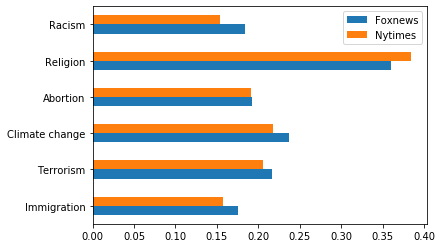

In [47]:
#surprise text2emotion accross the years graphics
Foxnews = [0.17517087308296242, 0.21587498458882556, 0.23715737951807267, 0.19239004149377587,
        0.3598325153852094, 0.18358656174334273]
Nytimes = [0.15778762767392618, 0.20558429299602934, 0.2173465346534656, 0.1906128550074739, 
        0.38464121054497746, 0.15313429988554034]
index = ['Immigration', 'Terrorism', 'Climate change',
         'Abortion', 'Religion', 'Racism']
df = pd.DataFrame({'Foxnews': Foxnews,
                   'Nytimes': Nytimes}, index = index)
ax = df.plot.barh()